# **Uniformly Random Graphs**

<hr></hr>

###  **Sections**
1. Implementing
2. Degree
3. Connected Components
4. Phase Transition
5. Histogram of the component size in the phase transition
6. Algorithms
7. Libraries

<hr></hr>

### **1. Implementing**

<hr></hr>

#### First of all, a uniformly radom graph is characterised by the number of nodes, N, and the probability of two nodes being connected, p. 

In [6]:
g = nx.generators.random_graphs.barabasi_albert_graph(50,1,1)

In [7]:
options = {
    'node_color': 'green',
    'node_size': 20,
    'width': 1,
}

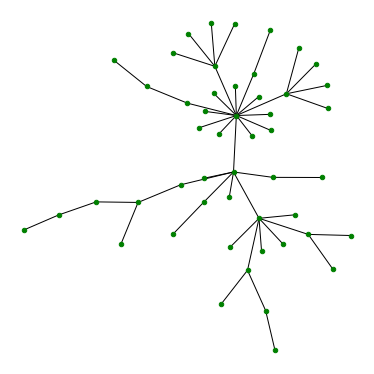

In [9]:
plt.figure(figsize=(5, 5))
nx.draw_kamada_kawai(g, **options)

<hr></hr>

### **2. Implementing**

<hr></hr>

In [13]:
g ,d = create_graph_BA(10000,5, 50)

In [17]:
count = count_degree(d, 10000)

In [23]:
x, y = remove_zeros_by_index(count)

In [44]:
log10_x = np.log10(x)[:80]
log10_y = np.log10(y)[:80]

In [45]:
popt, pcov = curve_fit(linear, log10_x, log10_y)
fit_y = linear(log10_x, *popt)

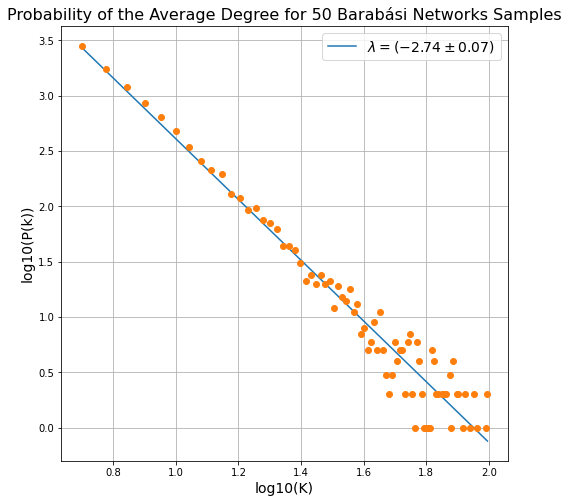

In [49]:
plt.figure(figsize=(8, 8))

plt.title('Probability of the Average Degree for 50 Barabási Networks Samples', fontsize = 16)

plt.xlabel('log10(K)',fontsize = 14)
plt.ylabel('log10(P(k))', fontsize = 14)

plt.plot(log10_x, fit_y)
plt.plot(log10_x, log10_y,'o')

plt.grid(True)

plt.legend([f'$\lambda = ({popt[0]:.2f} \pm {np.sqrt(pcov[0][0]):.2f}$)'], fontsize=14)

<hr></hr>

### **2. Implementing**

<hr></hr>

In [90]:
degrees = samples_graph(15000, 5, 100)

In [120]:
x, y = remove_zeros_by_index(degrees)

In [134]:
log10_x = np.log10(x)[:100]
log10_y = np.log10(y/100)[:100]

In [135]:
popt, pcov = curve_fit(linear, log10_x, log10_y)
fit_y = linear(log10_x, *popt)

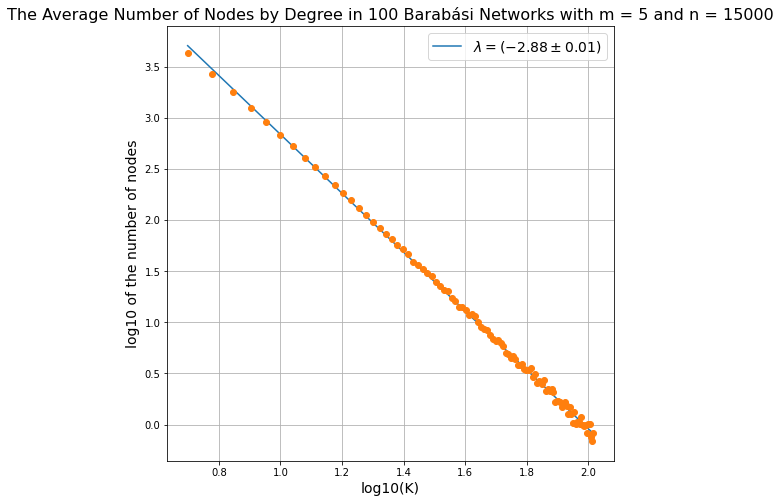

In [144]:
plt.figure(figsize=(8, 8))

plt.title('The Average Number of Nodes by Degree in 100 Barabási Networks with m = 5 and n = 15000', fontsize = 16)

plt.xlabel('log10(K)',fontsize = 14)
plt.ylabel('log10 of the number of nodes', fontsize = 14)

plt.plot(log10_x, fit_y)
plt.plot(log10_x, log10_y,'o')

plt.grid(True)

plt.legend([f'$\lambda = ({popt[0]:.2f} \pm {np.sqrt(pcov[0][0]):.2f}$)'], fontsize=14)

<hr></hr>

### **5. Algorithms**

<hr></hr>

In [10]:
def linear(x, m, b):
    return m*x+b

In [16]:
def count_degree(degrees, n_nodes, relative = False):
    d = [0]*(n_nodes - 1)

    for i in degrees:
        d[i] += 1
    
    return d

In [113]:
def remove_zeros_by_index(values):
    x = []
    y = []
    
    for v in range(len(values)):
        if values[v] != 0:
            x.append(v)
            y.append(values[v])
    
    return (np.array(x), np.array(y))

In [11]:
def create_graph_BA(N, c, seed = 42, ocurrence = True):
    np.random.seed(seed)
    
    connections = np.zeros((N,N), dtype = 'i')
    ocurrence = []
    degrees = np.zeros(N, dtype = 'i')
    
    # init state, where every every node is connected wtih each other
    for i in range(c+1):
        for j in range(i+1, c+1):
            connections[i][j] = 1
            connections[j][i] = 1
            
            ocurrence.append(i)
            ocurrence.append(j)

    for i in range(c+1, N):
        
        connected_nodes = []
        count = 0
        
        while count != c:
            position = np.random.randint(len(ocurrence))
            
            if position not in connected_nodes:
                connections[i][ocurrence[position]] = 1
                connections[ocurrence[position]][i] = 1
            
                ocurrence.append(i)
                ocurrence.append(ocurrence[position])
                
                degrees[i] += 1
                degrees[ocurrence[position]] += 1
                
                connected_nodes.append(ocurrence[position])
               
                count += 1
        
    if ocurrence:
        return (connections, degrees)

In [61]:
def samples_graph(n, c, n_sample):
    
    mean_degree = np.zeros(n, dtype = 'i')
    
    for seed in range(n_sample):
        
        G, d = create_graph_BA(n, c, seed)
        
        for degree in d:
            mean_degree[degree] += 1
    
    mean_degree = np.array(mean_degree)
    
    return mean_degree

### **5. Libraries**

<hr></hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
import networkx as nx
import time
from scipy.optimize import curve_fit